In [1]:
list.of.packages <- c("ggplot2","tidyverse","dplyr","hrbrthemes","ggpubr","ggrepel","scales","RColorBrewer")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages, repos = "http://cran.us.r-project.org")

invisible(lapply(list.of.packages, library, character.only = TRUE))

options(repr.matrix.max.rows=50, repr.matrix.max.cols=500)  

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.1.0     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
✔ purrr   0.3.3     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




### Database with one row for each publication-country association

In [2]:
df <- read_csv("../5_Final_databases/output/database_multi_rows_each_paper_one_per_country.csv")
sprintf("%i x %i dataframe", nrow(df), ncol(df))

Parsed with column specification:
cols(
  .default = col_double(),
  Country = col_character(),
  title = col_character(),
  ISO_3 = col_character(),
  Region = col_character(),
  authors = col_character(),
  source = col_character(),
  doi = col_character(),
  abstract = col_character(),
  author_keywords = col_character(),
  model = col_character(),
  scopus_number = col_character(),
  WOS_number = col_character()
)

See spec(...) for full column specifications.



[1] "4884 x 53 dataframe"

### Table with final topics names

In [3]:
topics_table <- read_csv("../4_Manual_treatment_topic_table/ouput/Table_topics.csv")
sprintf("%i x %i dataframe", nrow(topics_table), ncol(topics_table))

Parsed with column specification:
cols(
  Index = col_double(),
  Name = col_character(),
  Terms = col_character(),
  Category = col_character(),
  Sector = col_character(),
  `Relevant IPCC WG3 chapter` = col_character(),
  T0.02 = col_double(),
  T0.02Title = col_double()
)



[1] "39 x 8 dataframe"

#### List of topics with initial apparition order

In [4]:
topics_ini <- as.character(topics_table$Name)

#### List of topics ordered by ascending topic representation

In [5]:
topics_ordered <- topics_table %>% 
                                arrange(desc(T0.02))

In [6]:
topics_list <- as.character(topics_ordered$Name)

data1 <- df %>%
        select(Country,15:53)%>%
        group_by(Country)%>%
        summarise_all(list(sum))%>%
        ungroup()

### Database with total count of publications and topic apparition per country 

In [7]:
#first count topic studies per country
df1 <- df %>%
        select(Country,15:53)%>%
        group_by(Country)%>%
        summarise_all(list(sum))%>%
        ungroup()

#count total studies per country and add number of topic studies per country
df2 <- df %>%
        select(Country, Region) %>% 
        group_by(Country)%>%
        summarise(Region = first(Region),
                  count_papers_country = n())%>%
        ungroup()%>%
        inner_join(df1, by ='Country')


head(df2,2)
sprintf("%i x %i dataframe", nrow(df2), ncol(df2))                                    

Country,Region,count_papers_country,Energy efficiency,Climate change,Power,Vehicle,Cement,Forest,Steel/Iron,Buildings,Water,Air Pollution,Electricity,CCS,Transport,Policy-Dvlpt-Eco,Agriculture,Tax,Heat Pump,Consumption,Scenario,Wind/Solar,Costs,Coal,Nuclear,Fuel,Renewable Energies,Flood Risk,Technology,Bioenergy,Urban,Hydrogen,Permit market,Drought,Crop yield,Peak,Oil,Land Use,Target/INDC,Waste,System
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,Asia,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Albania,Europe,3,2,1,1,0,0,0,0,1,0,0,0,0,0,3,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


[1] "137 x 42 dataframe"

### Database with topic apparition for the 55 most represented countries
Order the dataframe by descending order of total studies and keep the 55 most represented countries

In [8]:
df_most <- head(df2[order(-df2$count_papers_country),],55) 
df_most <- data.frame(df_most)
head(df_most,2)

,Country,Region,count_papers_country,Energy.efficiency,Climate.change,Power,Vehicle,Cement,Forest,Steel.Iron,Buildings,Water,Air.Pollution,Electricity,CCS,Transport,Policy.Dvlpt.Eco,Agriculture,Tax,Heat.Pump,Consumption,Scenario,Wind.Solar,Costs,Coal,Nuclear,Fuel,Renewable.Energies,Flood.Risk,Technology,Bioenergy,Urban,Hydrogen,Permit.market,Drought,Crop.yield,Peak,Oil,Land.Use,Target.INDC,Waste,System
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,China,Asia,1140,474,429,184,80,248,36,54,72,59,239,115,51,111,1137,55,57,34,499,406,48,150,145,12,104,65,44,119,49,123,10,103,20,51,140,35,57,178,35,80
2,USA,North America,423,94,267,48,48,24,30,7,19,33,103,91,19,42,422,21,28,26,49,104,28,88,28,10,58,28,32,40,23,24,6,56,11,30,4,16,38,45,12,32


Use original names and exclude the topics *Policy-Dvlpt-Eco*,*Scenario*,*System* for this figure

In [9]:
row.names(df_most) <- df_most$Country
df_most_upd <- df_most %>%
                    select(-c(Region, count_papers_country))%>% 
                    rename_if(is.numeric, ~ topics_ini)%>% 
                    select(-c(as.name('Policy-Dvlpt-Eco'),Scenario,System))

head(df_most_upd,2)

,Country,Energy efficiency,Climate change,Power,Vehicle,Cement,Forest,Steel/Iron,Buildings,Water,Air Pollution,Electricity,CCS,Transport,Agriculture,Tax,Heat Pump,Consumption,Wind/Solar,Costs,Coal,Nuclear,Fuel,Renewable Energies,Flood Risk,Technology,Bioenergy,Urban,Hydrogen,Permit market,Drought,Crop yield,Peak,Oil,Land Use,Target/INDC,Waste
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
China,China,474,429,184,80,248,36,54,72,59,239,115,51,111,55,57,34,499,48,150,145,12,104,65,44,119,49,123,10,103,20,51,140,35,57,178,35
USA,USA,94,267,48,48,24,30,7,19,33,103,91,19,42,21,28,26,49,28,88,28,10,58,28,32,40,23,24,6,56,11,30,4,16,38,45,12


### Count the number of country-studies associated to each topic

Wide format to long format

In [10]:
df_most_lg <- pivot_longer(data = df_most_upd, 
                          cols = -c(1), 
                          names_to = "Topic", 
                          values_to = "Number")

In [11]:
head(df_most_lg)

Country,Topic,Number
<chr>,<chr>,<dbl>
China,Energy efficiency,474
China,Climate change,429
China,Power,184
China,Vehicle,80
China,Cement,248
China,Forest,36


In [12]:
country_order <- df_most_lg$Country[!duplicated(df_most_lg$Country)]
country_order

[1] "China"          "USA"            "United Kingdom" "European Union"
 [5] "India"          "Japan"          "Germany"        "Brazil"        
 [9] "Korea"          "Australia"      "Thailand"       "Canada"        
[13] "Indonesia"      "Mexico"         "Malaysia"       "Italy"         
[17] "Finland"        "Poland"         "France"         "Russia"        
[21] "Spain"          "Sweden"         "Switzerland"    "Iran"          
[25] "Netherlands"    "South Africa"   "Portugal"       "New Zealand"   
[29] "Turkey"         "Ireland"        "Nigeria"        "Greece"        
[33] "Norway"         "Viet Nam"       "Bangladesh"     "Pakistan"      
[37] "Austria"        "Chile"          "Colombia"       "Ethiopia"      
[41] "Nepal"          "Denmark"        "Romania"        "Saudi Arabia"  
[45] "Ecuador"        "Kenya"          "Ghana"          "Philippines"   
[49] "Egypt"          "Latvia"         "Algeria"        "Czechia"       
[53] "Kazakhstan"     "Belgium"        "Kuwait"

### Add column count_papers_country to compute the relative proportion of papers presenting a topic for each country

In [13]:
df_most <- df_most %>%
                    select(Country, count_papers_country)

In [14]:
df_most_lg <- merge(x = df_most_lg, y = df_most, by = "Country", all.x = TRUE)

In [15]:
df_most_lg <- df_most_lg %>%
                group_by(Country)%>%
                mutate(share = round(Number*100/count_papers_country,3))%>%
                ungroup()%>% 
                mutate(Country = factor(Country, levels = c(rev(country_order))),
                       Topic = factor(Topic, levels = c(topics_list)))

### Plot

#### Define breaks to color the legend

In [16]:
pretty_breaks <- c(0.01,10,20,30,40,50) 
minVal <- min(df_most_lg$share, na.rm = T)
maxVal <- max(df_most_lg$share, na.rm = T)
brks <- c(minVal, pretty_breaks, maxVal)

In [17]:
options(scipen=10000)

df_most_lg$brks <- cut(df_most_lg$share, breaks = brks, include.lowest = TRUE,dig.lab=10)
brks_scale <- levels(df_most_lg$brks)
labels_scale <- rev(brks_scale)

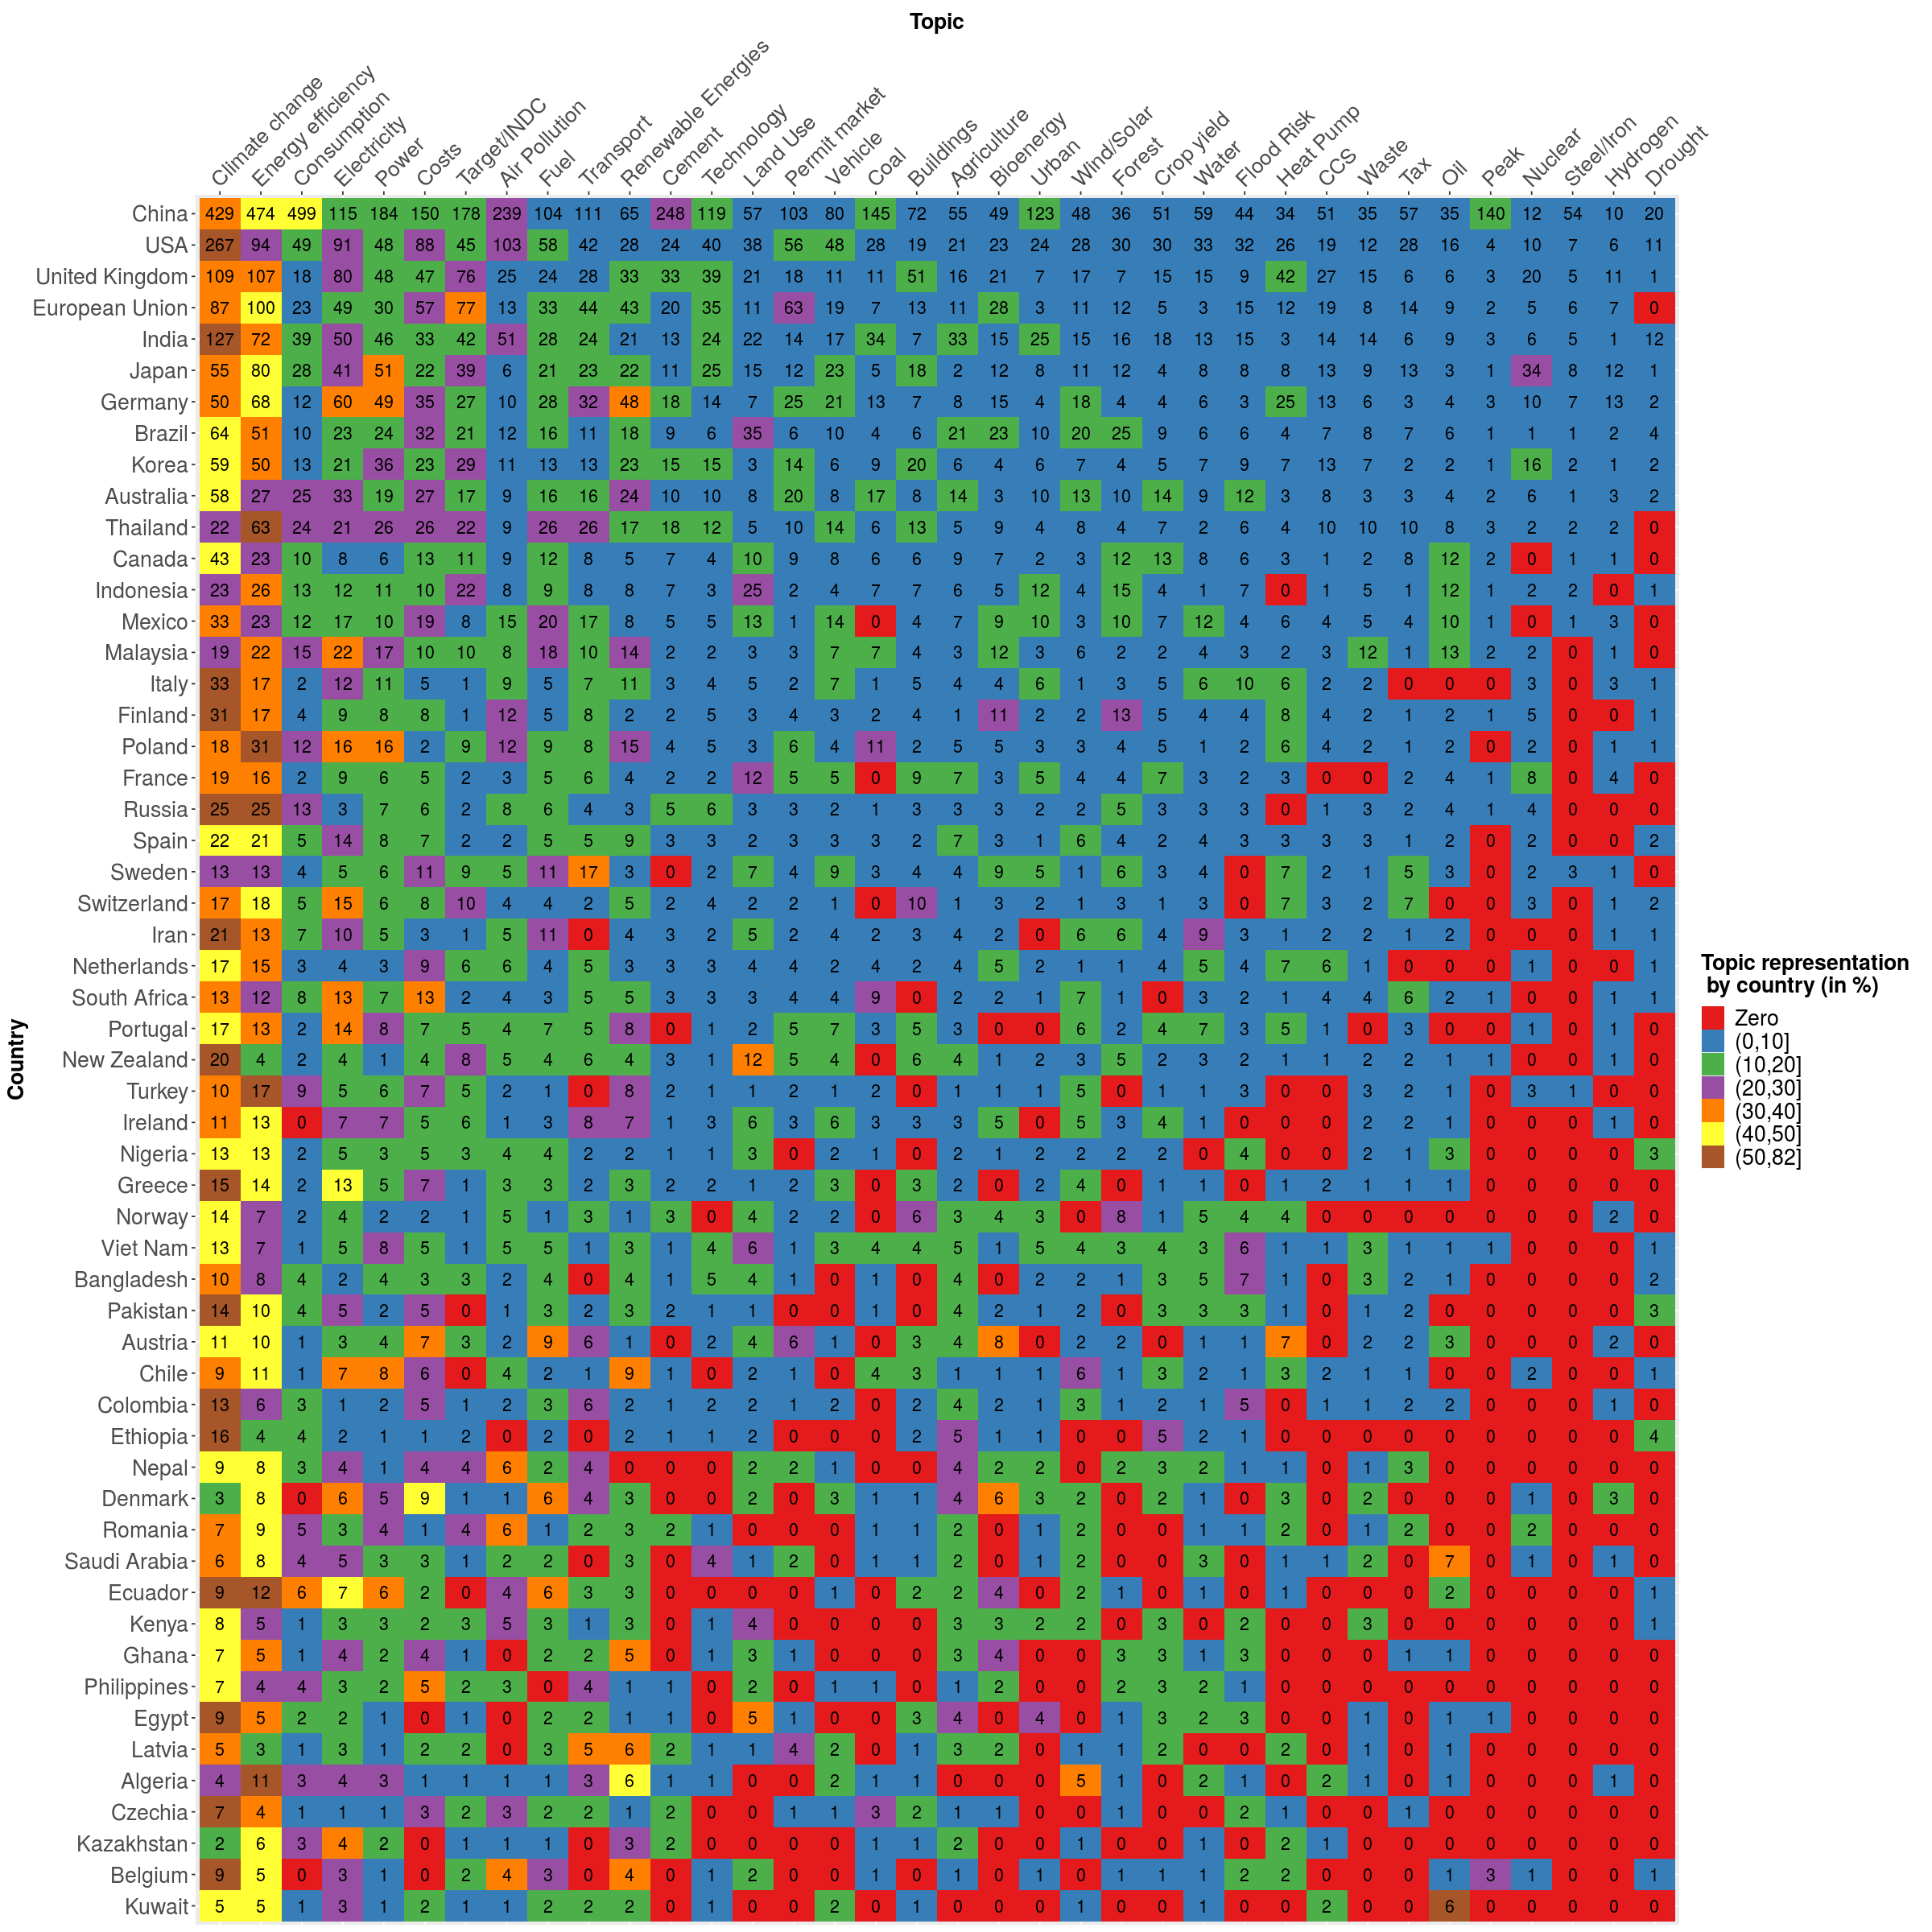

In [18]:
options(repr.plot.width=20, repr.plot.height=20)

plot <- ggplot(df_most_lg, mapping = aes(x = Topic, y = Country)) + 
            geom_tile(aes(fill = brks))+
            scale_fill_brewer(name = "Topic representation \n by country (in %)", 
                              label = c("Zero","(0,10]","(10,20]","(20,30]","(30,40]",
                                           "(40,50]","(50,82]"),
                              palette = "Set1") +
            geom_text(data = df_most_lg, aes(x=Topic,y=Country,label=Number), color="black", size=rel(4.5))+
            scale_x_discrete(position = "top") +
            theme(
                legend.title = element_text(size = 16,face ="bold"),
                legend.text = element_text(size = 16),
                legend.position = "right",
                axis.text.x = element_text(size = 16, angle=45,vjust = 1, hjust=0),
                axis.text.y = element_text(size = 16),
                axis.title.x = element_text(size = 16, hjust = 0.5,face ="bold"),
                axis.title.y = element_text(size = 16, hjust = 0.5,face ="bold")
              )  
plot

In [ ]:
ggsave('./output/Fig4_heatmap_55countries.png', height=20, width=20, plot=plot)